 #### 1.a 

In [1072]:
def F(n):
    s  =  " "
    a  =  1
    ch  =  65
    for i in range(1,n+1):
        print((n-i)*s, end = '')
        for j in range(1, a+1):
            if j <= (a+1)/2:
                print(chr(ch+i-j), end = '')
            else:
                print(chr(ch+j-(a+1)//2), end = '')
        a +=  2
        print()
#tests
F(10)
F(6)

         A
        BAB
       CBABC
      DCBABCD
     EDCBABCDE
    FEDCBABCDEF
   GFEDCBABCDEFG
  HGFEDCBABCDEFGH
 IHGFEDCBABCDEFGHI
JIHGFEDCBABCDEFGHIJ
     A
    BAB
   CBABC
  DCBABCD
 EDCBABCDE
FEDCBABCDEF


#### 1.b

In [1073]:
def F(d : dict):
    keys  =  sorted(d.keys())
    l  =  []
    print("by keys:")
    for i in keys:
        print(i, d[i][0],d[i][1])
        l.append((d[i][0], d[i][1], i))
    x  =  sorted(l, key  =  lambda x : x[0], reverse  =  True)
    y  =  sorted(l, key  =  lambda x : x[1])
    print("by x-s:")
    for j in range(len(x)):
        print(x[j][2], x[j][0], x[j][1])
    print("by y-s:")
    for k in range(len(y)):
        print(y[k][2], y[k][0], y[k][1])

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

by keys:
1 1 2
2 -1 4
4 2 3
5 -4 3
by x-s:
4 2 3
1 1 2
2 -1 4
5 -4 3
by y-s:
1 1 2
4 2 3
5 -4 3
2 -1 4
by keys:
-8 4 2
5 9 -10
6 -3 4
7 2 1
by x-s:
5 9 -10
-8 4 2
7 2 1
6 -3 4
by y-s:
5 9 -10
7 2 1
-8 4 2
6 -3 4


#### 3.a

In [1074]:
from scipy.optimize import minimize

def f(r):
    x, y = r
    return (2*(x - y - 3)**2 + 4*(x+ 2*y + 2)**4)

def constraint1(r):
    x, y = r
    return x - y -3

def constraint2(r):
     x, y = r
     return 5 - (x+2)**2 - (y + 1)**2

con = [{'type': 'ineq', 'fun': constraint1}, {'type': 'ineq', 'fun': constraint1}]
result = minimize(f, [0,0], constraints = con) 
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 5.123639964607271e-07
       x: [ 1.340e+00 -1.660e+00]
     nit: 17
     jac: [ 1.084e-04  2.167e-04]
    nfev: 55
    njev: 17


#### 3.b

In [1075]:
from scipy.integrate import quad
import numpy as np
import math
def f(x, y): # the scalar function
    return x**2 + y**4

def g(r, u): # path paramterization; ndarrays returned
    return (r*np.cos(u), r*np.sin(u))

def d_l(r, t, x): 
    a, b = g(r, t)
    k = np.abs(t - x) # index of element closest to x can be extracted 
    return (np.gradient(a, t)[np.argmin(k)]**2 + np.gradient(b, t)[np.argmin(k)]**2)**0.5  # gradeint as function of x, effectively

def integrand(x, r): # integrand as function of x
    v=np.linspace(0, 2*np.pi, 100)
    return f(float(g(r, x)[0]), float(g(r, x)[0])) * d_l(r, v, x) 

radius=3**0.5
print(quad(integrand, 0, 2 * math.pi, args=(radius,)))
    

(53.018685546149165, 2.551405713023626e-08)


#### 4.

In [1076]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt
import random

In [1077]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    return np.loadtxt(data_path, delimiter=',')


In [1078]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers = None):
    if init_centers:
        return init_centers
    else:
          return data[np.random.choice(data.shape[0], K, replace=False)]

In [1079]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [1080]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    v = data-np.split(centers, centers.shape[0]) # components of vectors joining centers to points, grouped by center
    return ((np.sum(v**2, axis = 2))**0.5).T # transpose for grouping distances by point

In [1081]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis  =  1) # indices correspond to center labels (0,1,...K-1)

In [1082]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    x=np.zeros((K,2))
    for i in range (K): 
        x[(i,)]=np.mean(data[(np.argwhere(labels==i),)],axis=0)
    return x

In [1083]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if (labels1 == labels2).all():
        return True
    else:
        return False

In [1084]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 


In [1085]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    
    plt.title(str(centers.shape[0])+'-means clustering')
    
    ### Set xlabel as 'Longitude'
    
    plt.xlabel('Longitude')
    
    ### Set ylabel as 'Latitude'
    
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    
    plt.savefig(fname=(str(centers.shape[0])+'means.png'))


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0010085105895996094


<module 'matplotlib.pyplot' from 'c:\\Users\\Ram Jyothy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

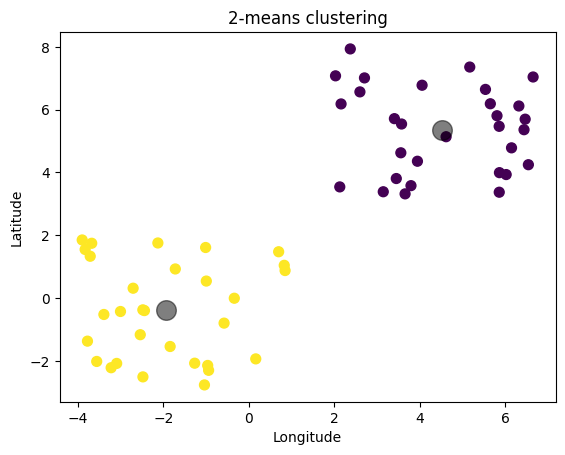

In [1086]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)